In [3]:
import csv
import pandas
from pandas import Series, DataFrame
import pandas as pd
import sqlite3
import numpy as np
import geopandas
from shapely.geometry import Polygon, Point

In [4]:
file = open('Top_Registered_Polls.csv', encoding='utf-8')
file_reader = csv.reader(file)
Polls = list(file_reader)
header = Polls[0]
Polling = Polls[1:]
Pollings = DataFrame(Polling, columns = header)

In [5]:
Pollings

,Polling Place,Registered Voters
0,Porchlight,4516
1,Lowell Center,4511
2,Capitol Lakes Retirement,4077
3,Lapham,3851
4,Hub Madison,3755
5,Coventry Village,3708
6,Doyle Administration,3569
7,Gates of Heaven,3558
8,Gordon Dining,3517
9,Wil-Mar,3431


In [6]:
file = open('Polling_Places.csv', encoding='utf-8')
file_reader = csv.reader(file)
Polling_place = list(file_reader)
header = Polling_place[0]
Polling_all = Polling_place[1:]
Poll_loc = DataFrame(Polling_all, columns = header)

In [7]:
Poll_loc
conn = sqlite3.connect('Poll_loc')
Poll_loc.to_sql("Poll_loc", conn, if_exists="replace", index=False)
def qry(sql):
    return pd.read_sql(sql,conn)
Location = qry('''
SELECT \ufeffX as 'X', Y, tvpoll_p_BLDG_NAME as "Polling Location"
FROM Poll_loc
GROUP BY tvpoll_p_BLDG_NAME
''')
Location
Location.to_csv('Consolidated_Polling_Location.csv', encoding='utf-8', index=False)
#DataFrame of polling locations - cleaned

In [8]:
file = open('Consolidated_Polling.csv', encoding='utf-8')
file_reader = csv.reader(file)
Polling = list(file_reader)
header = Polling[0]
Polling_all = Polling[1:]
Poll_loc = DataFrame(Polling_all, columns = header)

In [9]:
file = open('Least_Registered_Polls.csv', encoding='utf-8')
file_reader = csv.reader(file)
Polls = list(file_reader)
header = Polls[0]
Polling = Polls[1:]
Least_Pollings = DataFrame(Polling, columns = header)

In [10]:
low_plot = []
for i in Least_Pollings["Polling Place"]:
    dict = {}
    for k in range(len(Poll_loc["Polling Location"])):
        if Poll_loc["Polling Location"][k] == i:
            dict["name"] = i
            dict["Location"] = Point(float(Poll_loc["X"][k]), float(Poll_loc["Y"][k]))
            low_plot.append(dict)
location_low = pd.DataFrame(low_plot)
location_low = geopandas.GeoDataFrame(location_low, geometry="Location")
#15 lowest registration polling places and location

,Location,name
0,POINT (-89.49766815556283 43.03384891910501),West Police
1,POINT (-89.3934981483975 43.04600819083633),Catholic Multicultural Center
2,POINT (-89.27947462083917 43.14415279275691),Fire Station #11
3,POINT (-89.43753098820606 43.08626782424495),Eagle Heights
4,POINT (-89.42272848285232 43.06665793432364),Blessed Sacrament
5,POINT (-89.39518106299631 43.04104717893443),Village on Park
6,POINT (-89.45891705656739 43.0286903066036),Revival Ridge
7,POINT (-89.32872436809996 43.11903839145751),E. Madison Community Cntr
8,POINT (-89.36267091472214 43.11704378206384),Sherman
9,POINT (-89.31160032302805 43.12911407328211),Eastside Lutheran


In [9]:
to_plot = []
for i in Pollings["Polling Place"]:
    dict = {}
    for k in range(len(Poll_loc["Polling Location"])):
        if Poll_loc["Polling Location"][k] == i:
            dict["name"] = i
            dict["Location"] = Point(float(Poll_loc["X"][k]), float(Poll_loc["Y"][k]))
            to_plot.append(dict)
location = pd.DataFrame(to_plot)
location = geopandas.GeoDataFrame(location, geometry="Location")
#15 highest registered polling places and location

In [10]:
poll = geopandas.read_file("Polling_Places")
city = geopandas.read_file("City_Limit")
water = geopandas.read_file("Lakes_and_Rivers")
alder = geopandas.read_file("Aldermanic_Districts")
wards = geopandas.read_file("Wards")

ax = city.plot(color="lightgray", figsize=(20,20))
water.plot(color="lightblue",  ax=ax)
location.plot(color="black", marker="x", markersize = 200, ax=ax, label = "Highest Registration")
location_low.plot(color="red", marker="x", markersize = 200, ax=ax, label = "Lowest Registration")
ax.legend(fontsize=20)
ax.set_title("Voter Registration",  fontsize=30)
ax.set_axis_off()
#plotting registration locations over city map

In [11]:
#The locations with the highest registration are located generally downtown. This could have to do with the higher
#population density downtown that causes more people to be pre-registered for elections. 

In [12]:
file = open('Least_Turnout_Polls.csv', encoding='utf-8')
file_reader = csv.reader(file)
Polls = list(file_reader)
header = Polls[0]
Polling = Polls[1:]
Least_Turnout = DataFrame(Polling, columns = header)
file = open('Top_Turnout_Polls.csv', encoding='utf-8')
file_reader = csv.reader(file)
Polls = list(file_reader)
header = Polls[0]
Polling = Polls[1:]
Top_Turnout = DataFrame(Polling, columns = header)
Least_Turnout
#15 least turnout polling places

,Polling Place,Total Turnout
0,West Police,463
1,Eagle Heights,539
2,Catholic Multicultural Center,586
3,Fire Station #11,609
4,Packers Townhomes,660
5,Ogg Hall,701
6,Oakwood Village Prairie Ridge,709
7,Village on Park,715
8,Revival Ridge,760
9,Blessed Sacrament,835


In [13]:
top_turnout_plot = []
for i in Top_Turnout["Polling Place"]:
    dict = {}
    for k in range(len(Poll_loc["Polling Location"])):
        if Poll_loc["Polling Location"][k] == i:
            dict["name"] = i
            dict["Location"] = Point(float(Poll_loc["X"][k]), float(Poll_loc["Y"][k]))
            top_turnout_plot.append(dict)
thislocation = pd.DataFrame(top_turnout_plot)
high_location = geopandas.GeoDataFrame(thislocation, geometry="Location")
#highest turnout location

In [14]:
least_turnout_plot = []
for i in Least_Turnout["Polling Place"]:
    dict = {}
    for k in range(len(Poll_loc["Polling Location"])):
        if Poll_loc["Polling Location"][k] == i:
            dict["name"] = i
            dict["Location"] = Point(float(Poll_loc["X"][k]), float(Poll_loc["Y"][k]))
            least_turnout_plot.append(dict)
thatlocation = pd.DataFrame(least_turnout_plot)
low_location = geopandas.GeoDataFrame(thatlocation, geometry="Location")
#lowest turnout location

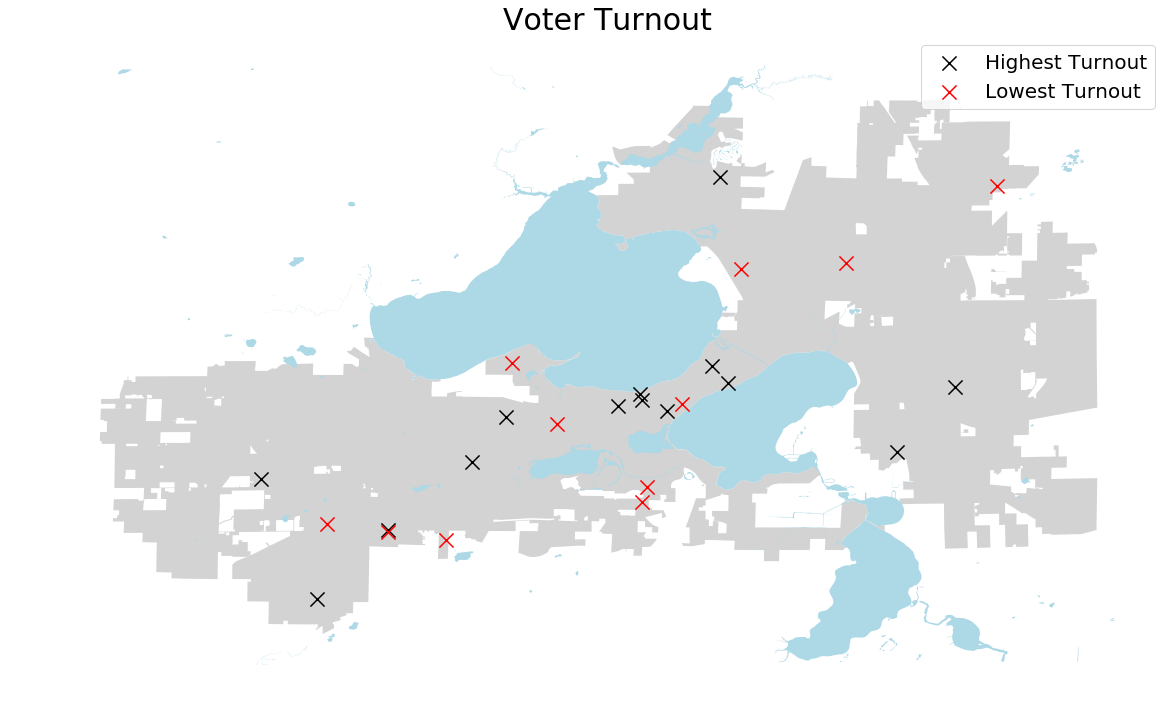

In [15]:
poll = geopandas.read_file("Polling_Places")
city = geopandas.read_file("City_Limit")
water = geopandas.read_file("Lakes_and_Rivers")
alder = geopandas.read_file("Aldermanic_Districts")
wards = geopandas.read_file("Wards")

ax = city.plot(color="lightgray", figsize=(20,20))
water.plot(color="lightblue",  ax=ax)
high_location.plot(color="black", marker="x", markersize = 200, ax=ax, label = "Highest Turnout")
low_location.plot(color="red", marker="x", markersize = 200, ax=ax, label = "Lowest Turnout")
ax.legend(fontsize=20)
ax.set_title("Voter Turnout",  fontsize=30)
ax.set_axis_off()
#turnout locations plotted over map of the city

In [16]:
#Voter turnout is not as closely localized as registration. This may be  because turnout is reliant on who shows up,
#not high opportunity for registration. Something to look more closely at would be how population density
#plays into both voter registration and turnout.

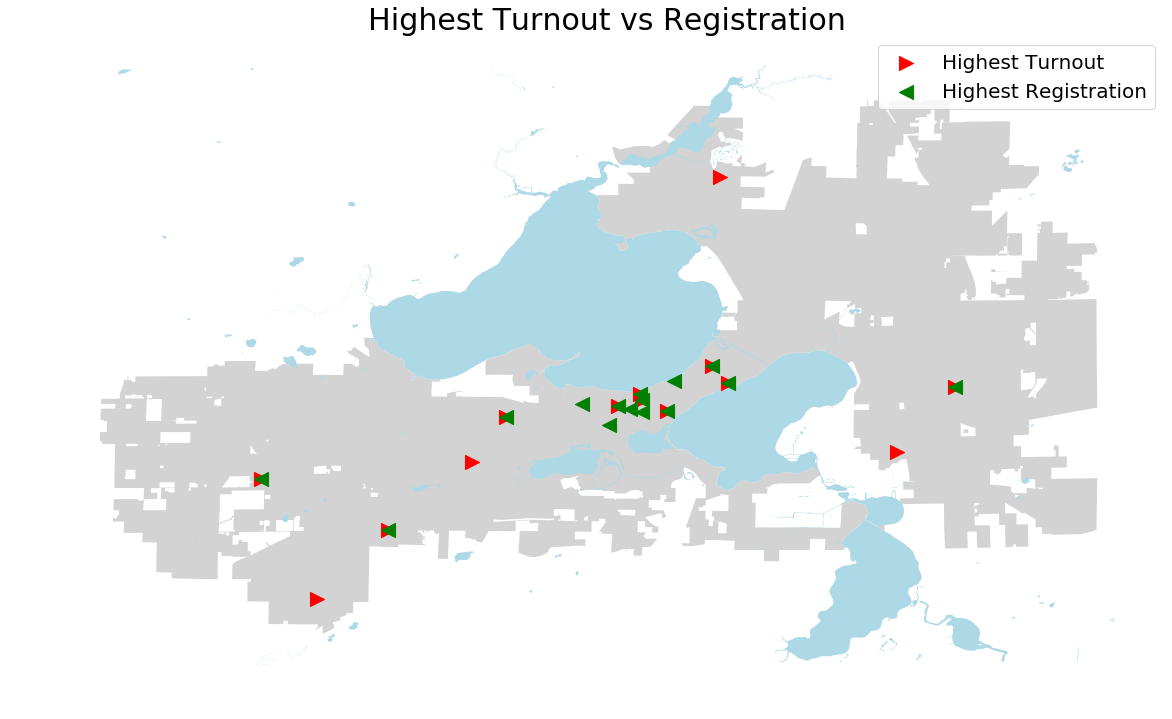

In [38]:
ax = city.plot(color="lightgray", figsize=(20,20))
water.plot(color="lightblue",  ax=ax)
high_location.plot(color="red", marker=">", markersize = 200, ax=ax, label= "Highest Turnout")
location.plot(color="green", marker="<", markersize = 200, ax=ax, label = "Highest Registration")
ax.legend(fontsize=20)
ax.set_title("Highest Turnout vs Registration",  fontsize=30)
ax.set_axis_off()

In [18]:
#This displays that many locations have both high turnout and high registration, with the few outliers being 
#the higher registration area downtown.

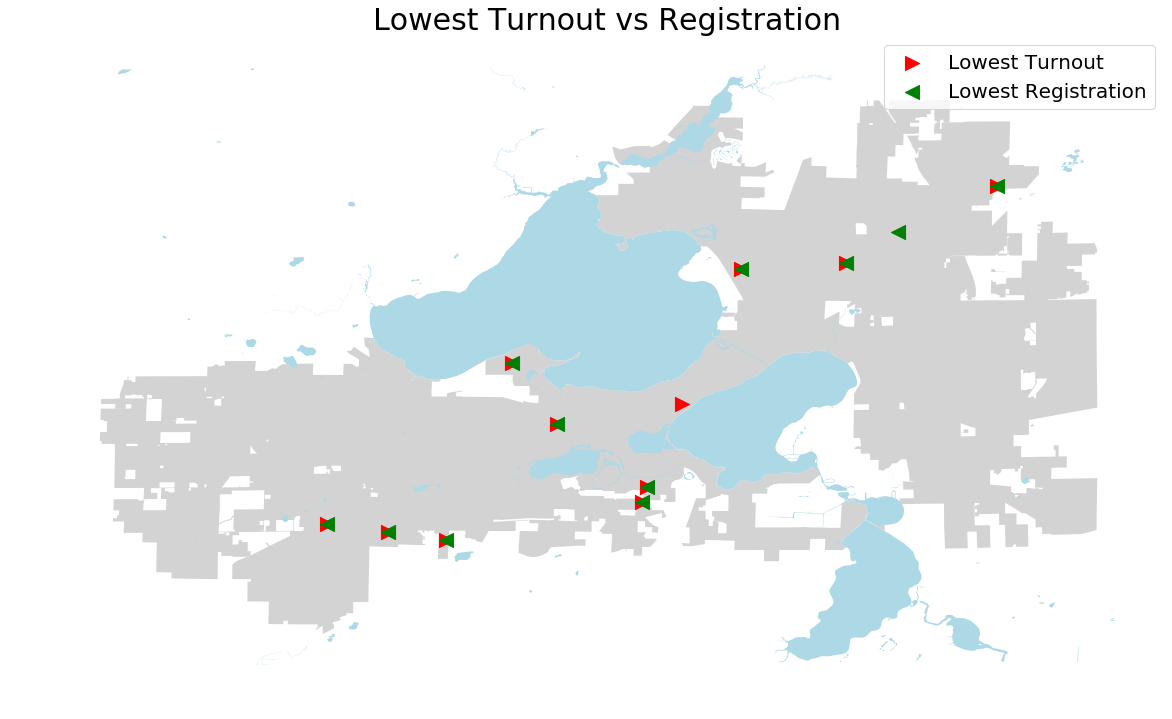

In [40]:
ax = city.plot(color="lightgray", figsize=(20,20))
water.plot(color="lightblue",  ax=ax)
low_location.plot(color="red", marker=">", markersize = 200, ax=ax, label = "Lowest Turnout")
location_low.plot(color="green", marker="<", markersize = 200, ax=ax, label = "Lowest Registration")
ax.legend(fontsize=20)
ax.set_title("Lowest Turnout vs Registration",  fontsize=30)
ax.set_axis_off()

In [ ]:
#This displays the almost perfect overlapping of low turnout and low registration polling places,
#showing high correlation.

In [2]:
#Mayoral Election Winner Analyses for 2011, 2015, 2019

#Useful links
#https://elections.countyofdane.com/Election-Dates
#https://library.municode.com/wi/madison/codes/code_of_ordinances?nodeId=COORMAWIVOICH1--10_CH3OFBOEMPURE_SUBCHAPTER_3AOROFDE_3.03MA

In [3]:
import pandas as pd
import geopandas
from shapely.geometry import Polygon, Point
from pandas import Series, DataFrame
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify
import sqlite3
import sys
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


In [4]:
city = geopandas.read_file("City_Limit")
water = geopandas.read_file("Lakes_and_Rivers")
wards = geopandas.read_file("Wards")
pd.set_option('display.max_rows', 500)




In [5]:
x = wards.sort_values(by=["WARD"])
x.reset_index(drop=True)
y = x[102:]
wards = y.reset_index(drop=True)
#wards["WARD"].replace(1,200)
test = wards["WARD"]
#test


In [6]:
#200 is 2nd 1
test.at[1] = 200
#201 is 3rd 1
test.at[2] = 201
#202 is 2nd 29
test.at[31] = 202
#203 is 2nd 69
test.at[72] = 203
#204 is 3rd 69
test.at[73] = 204
#205 is 4th 69
test.at[74] = 205
#206 is 2nd 75
test.at[81] = 206
#207 is 2nd 122
test.at[129] = 207
#208 is 2nd 131
test.at[138] = 209


In [7]:
wards["WARD"] = test


In [8]:
#2019 Election
file = open("ElectionResults.csv", encoding = 'utf-8')
file_reader = csv.reader(file)
f = list(file_reader)
header = f[0]
info = f[1:]
turnout = pd.DataFrame(info, columns=header)
turnout['Wards'] = turnout["Wards"].astype(int)


In [9]:
turnout['Paul R. Soglin'] = turnout['Paul R. Soglin'].astype(float)
turnout['Satya Rhodes-Conway'] = turnout['Satya Rhodes-Conway'].astype(float)

turnout["Diff"] = (turnout["Satya Rhodes-Conway"]/(turnout["Satya Rhodes-Conway"]+turnout["Paul R. Soglin"]))*100

In [10]:
geog = list(wards["geometry"])
wds = list(wards["WARD"])

v = list(turnout["Wards"])
d = list(turnout["Diff"])

In [11]:
ward_num = []
shape = []
turn = []

for num in v:

    for ward in wds:
        if num == ward:
            ward_num.append(ward)
            turn.append(d[v.index(num)])
            shape.append(geog[wds.index(ward)])

In [12]:
zipped = list(zip(ward_num,turn, shape))
turnout_ward = pd.DataFrame(zipped, columns=["Ward", "Votes", "geometry"])
turnout_ward = geopandas.GeoDataFrame(turnout_ward, geometry="geometry")


In [13]:
turnout_ward["Center"] = turnout_ward["geometry"].centroid
center = turnout_ward["Center"]

In [14]:
center = geopandas.GeoDataFrame(center, geometry = center)


In [15]:
geo = Point(-89.3842, 43.0747) #capitol coordinates


In [16]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2=-89.3842, lat2=43.0747):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 3956 # Radius of earth in miles. Use 6371 for kilometers
    return c * r

haversine(-89.34, 43.08)

2.258969668674308

In [17]:
distance = []
n=0
for point in center["geometry"]:
    lon = center["geometry"][n].coords[0][0]
    lat = center["geometry"][n].coords[0][1]
    dist = haversine(lon, lat)
    distance.append(dist)
    n+=1
distance = Series(distance)
center["distance"] = distance
#center["distance"]

In [18]:
#zipped = list(zip(ward_num,turn, shape))
#turnout_ward = pd.DataFrame(zipped, columns=["Ward", "Votes", "geometry"])

turnout_ward["distance"] = center["distance"]

zipped = list(zip(turnout_ward["Ward"], turnout_ward["Votes"], turnout_ward["distance"]))
distance = pd.DataFrame(zipped, columns=["Ward", "Votes", "distance"])
#distance

In [19]:
#distance.to_csv("Distance_from_Capitol.csv", encoding="utf-8", index=False)

In [20]:
conn = sqlite3.connect("distance")
distance.to_sql("distance", conn, if_exists = "replace", index=False)
def qry(sql):
    return pd.read_sql(sql, conn)

In [21]:
#Satya
q1 = qry('''
SELECT Votes, distance from distance
WHERE Votes > 70.0''')
#q1

In [22]:
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Percent of Vote for Satya Rhodes-Conway (Winner - 2019)')

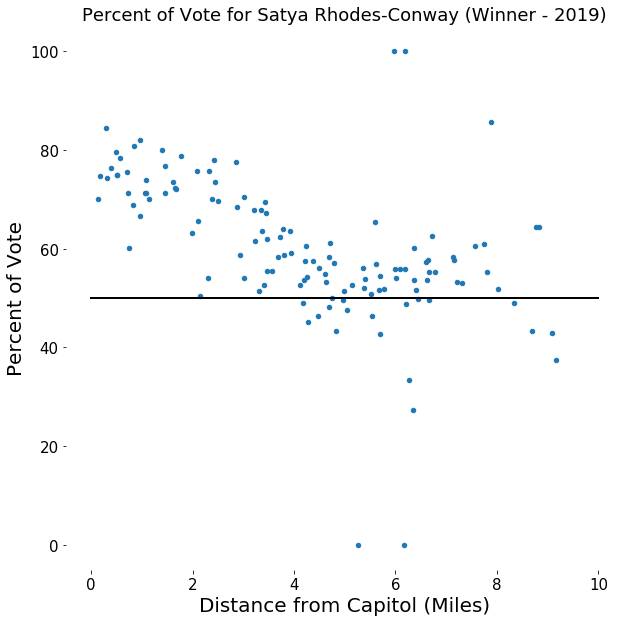

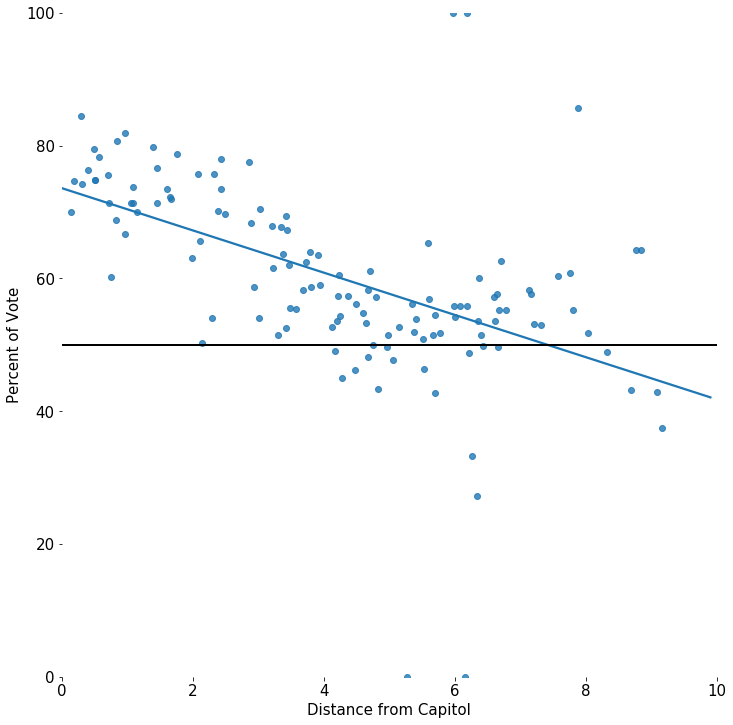

In [23]:
ax = distance.plot.scatter(x='distance',y='Votes', figsize=(10,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel('Percent of Vote', fontsize=20)
ax.set_xlabel('Distance from Capitol (Miles)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot([0, 10], [50, 50], 'k-', lw=2)


sns.lmplot(x='distance',y='Votes',data=distance,fit_reg=True, ci=None, size=10) 
plt.plot([0, 10], [50, 50], 'k-', lw=2)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axis((0,10,0,100))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Percent of Vote", fontsize=15)
plt.xlabel("Distance from Capitol", fontsize=15)

ax.set_title('Percent of Vote for Satya Rhodes-Conway (Winner - 2019)', fontsize=18)

In [24]:
#Conclusion: With the best fit line, it is clear that Satya had a larger percentage of the vote the closer one
#gets to the Capitol

In [27]:

q2 = qry('''
SELECT Votes, avg(distance) from distance
WHERE Votes > 50.0''')
#q2

In [28]:
q3 = qry('''
SELECT avg(Votes), avg(distance) from distance
WHERE Votes < 50.0''')
#q3

In [29]:
q4 = qry('''
SELECT Votes, distance from distance
WHERE Votes < 50.0''')
#q4

In [30]:
#https://gist.github.com/bdjackson/2215109d2eaa8c68919c
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

class MidpointNormalize(mpl.colors.Normalize):
    """
    class to help renormalize the color scale
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        mpl.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


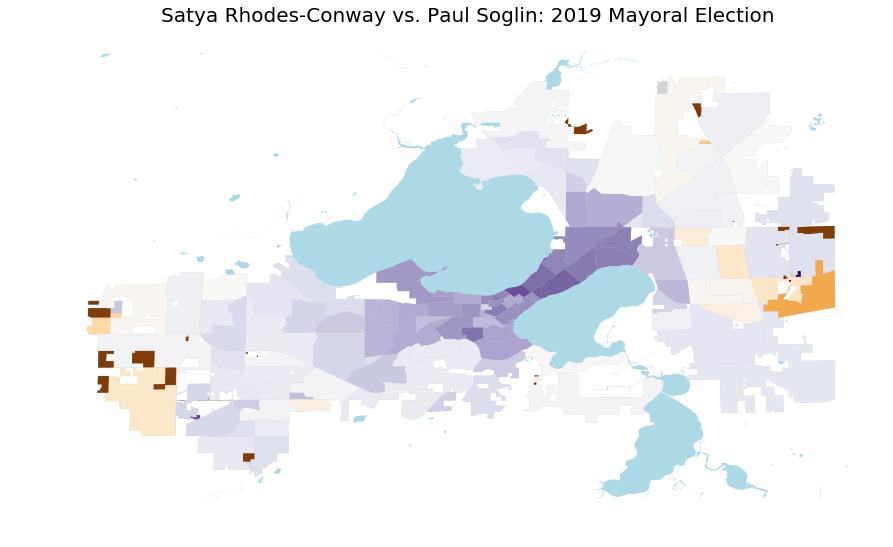

In [31]:

ax = city.plot(color="lightgray", figsize=(15,15))
water.plot(color="lightblue", ax=ax)
norm=MidpointNormalize(midpoint=50)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="15%", pad=0.1)
turnout_ward.plot(column="Votes", cmap="PuOr", norm=norm,figsize=(15,15), ax=ax)
#center.plot(marker=".",color="black", ax=ax)
ax.set_title("Satya Rhodes-Conway vs. Paul Soglin: 2019 Mayoral Election", fontsize=20)

ax.set_axis_off()

In [32]:
#2015 Election
file = open("ElectionResults_2015.csv", encoding = 'utf-8')
file_reader = csv.reader(file)
f = list(file_reader)
header = f[0]
info = f[1:]
turnout = pd.DataFrame(info, columns=header)
turnout['Wards'] = turnout["Wards"].astype(int)

In [33]:
turnout['Paul R. Soglin'] = turnout['Paul R. Soglin'].astype(float)
turnout['Scott Resnick'] = turnout['Scott Resnick'].astype(float)

turnout["Diff"] = (turnout["Paul R. Soglin"]/(turnout["Scott Resnick"]+turnout["Paul R. Soglin"]))*100

In [34]:
geog = list(wards["geometry"])
wds = list(wards["WARD"])

v = list(turnout["Wards"])
d = list(turnout["Diff"])

In [35]:
ward_num = []
shape = []
turn = []

for num in v:

    for ward in wds:
        if num == ward:
            ward_num.append(ward)
            turn.append(d[v.index(num)])
            shape.append(geog[wds.index(ward)])
            
zipped = list(zip(ward_num,turn, shape))
turnout_ward = pd.DataFrame(zipped, columns=["Ward", "Votes", "geometry"])
turnout_ward = geopandas.GeoDataFrame(turnout_ward, geometry="geometry")
#turnout_ward

In [36]:
turnout_ward["Center"] = turnout_ward["geometry"].centroid
center = turnout_ward["Center"]
center = geopandas.GeoDataFrame(center, geometry = center)

In [37]:
distance = []
n=0
for point in center["geometry"]:
    lon = center["geometry"][n].coords[0][0]
    lat = center["geometry"][n].coords[0][1]
    dist = haversine(lon, lat)
    distance.append(dist)
    n+=1
distance = Series(distance)
center["distance"] = distance
#center

In [67]:
turnout_ward["distance"] = center["distance"]

zipped = list(zip(turnout_ward["Ward"], turnout_ward["Votes"], turnout_ward["distance"]))
distance = pd.DataFrame(zipped, columns=["Ward", "Votes", "distance"])


In [39]:
conn = sqlite3.connect("distance")
distance.to_sql("distance", conn, if_exists = "replace", index=False)
def qry(sql):
    return pd.read_sql(sql, conn)

In [40]:
q1 = qry('''
SELECT Votes, distance from distance
WHERE Votes > 50.0''')
#q1

In [41]:
q2 = qry('''
SELECT Votes, avg(distance) from distance
WHERE Votes>50.0''')
#q2

In [42]:
q3 = qry('''
SELECT Votes, avg(distance) from distance
WHERE Votes<50.0''')
#q3

Text(0.5, 1.0, 'Margin of Win for Paul R. Soglin (Winner - 2015)')

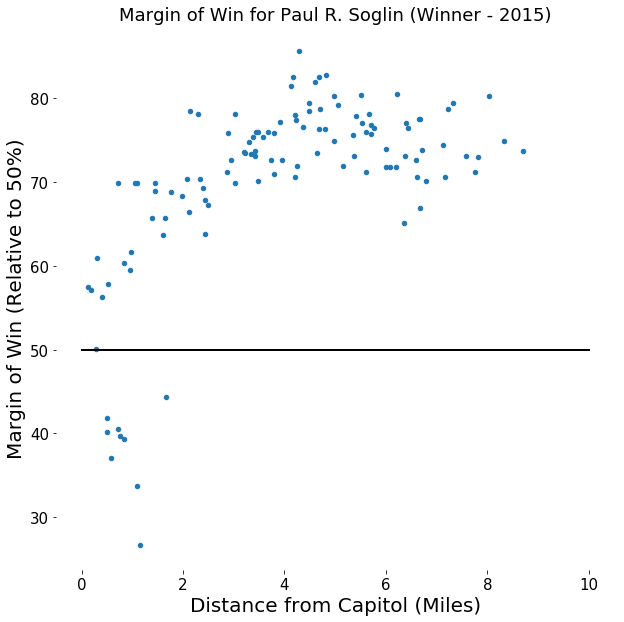

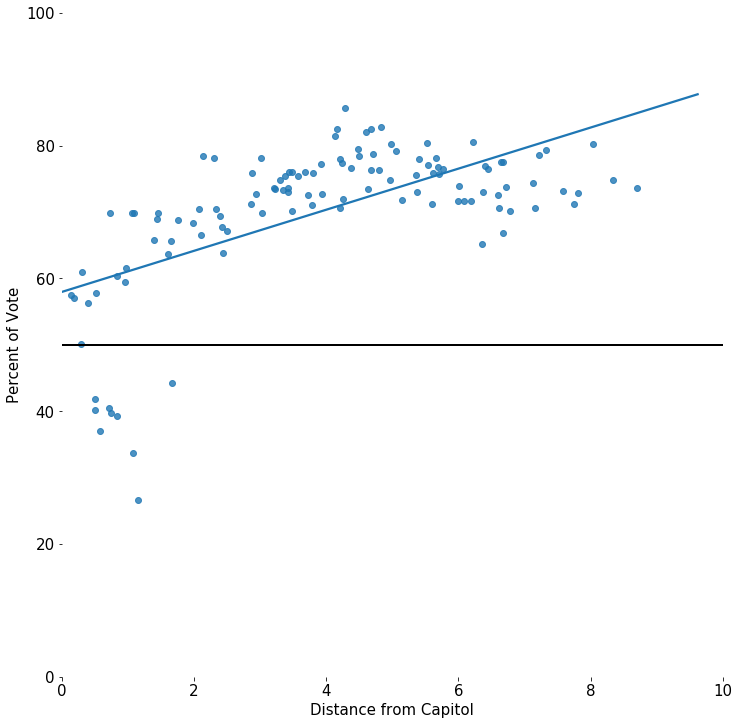

In [43]:
ax = distance.plot.scatter(x='distance',y='Votes', figsize=(10,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel('Margin of Win (Relative to 50%)', fontsize=20)
ax.set_xlabel('Distance from Capitol (Miles)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot([0, 10], [50, 50], 'k-', lw=2)


sns.lmplot(x='distance',y='Votes',data=distance,fit_reg=True, ci=None, size=10) 
plt.plot([0, 10], [50, 50], 'k-', lw=2)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axis((0,10,0,100))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Percent of Vote", fontsize=15)
plt.xlabel("Distance from Capitol", fontsize=15)

ax.set_title('Margin of Win for Paul R. Soglin (Winner - 2015)', fontsize=18)

In [44]:
#Conclusion: The best fit line shows that Paul Soglin got a majority of the vote overall since the line is 
#entirely above the 50% line. He also had a larger percentage of the vote the farther one gets from the Capitol

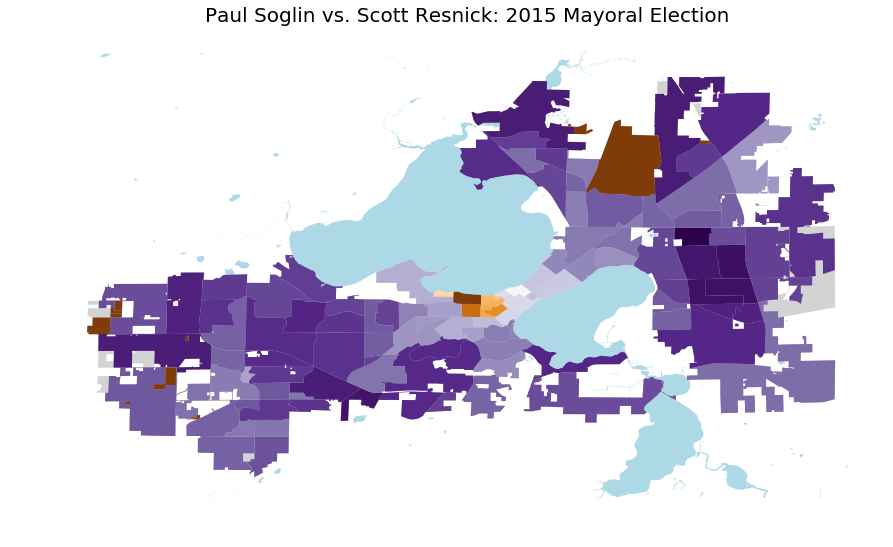

In [46]:

ax = city.plot(color="lightgray", figsize=(15,15))
water.plot(color="lightblue", ax=ax)
norm=MidpointNormalize(midpoint=50)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="15%", pad=0.1)
turnout_ward.plot(column="Votes", cmap="PuOr", norm=norm,figsize=(15,15), ax=ax)
ax.set_title("Paul Soglin vs. Scott Resnick: 2015 Mayoral Election", fontsize=20)

ax.set_axis_off()

In [47]:
#precinct data cut off after ward 126 --> some wards are gray
#wards were added after December 2014
#Source: https://library.municode.com/wi/madison/codes/code_of_ordinances?nodeId=COORMAWIVOIICH11--19_CH15ALDIWA_15.02WAWABO

In [48]:
#2011 Election
file = open("ElectionResults_2011.csv", encoding = 'utf-8')
file_reader = csv.reader(file)
f = list(file_reader)
header = f[0]
info = f[1:]
turnout = pd.DataFrame(info, columns=header)
turnout['Wards'] = turnout["Wards"].astype(int)

In [49]:
turnout['Paul R. Soglin'] = turnout['Paul R. Soglin'].astype(float)
turnout['Dave Cieslewicz'] = turnout['Dave Cieslewicz'].astype(float)

turnout["Diff"] = (turnout["Paul R. Soglin"]/(turnout["Dave Cieslewicz"]+turnout["Paul R. Soglin"]))*100

In [50]:
geog = list(wards["geometry"])
wds = list(wards["WARD"])

v = list(turnout["Wards"])
d = list(turnout["Diff"])

In [51]:
ward_num = []
shape = []
turn = []

for num in v:

    for ward in wds:
        if num == ward:
            ward_num.append(ward)
            turn.append(d[v.index(num)])
            shape.append(geog[wds.index(ward)])
            
zipped = list(zip(ward_num,turn, shape))
turnout_ward = pd.DataFrame(zipped, columns=["Ward", "Votes", "geometry"])
turnout_ward = geopandas.GeoDataFrame(turnout_ward, geometry="geometry")

In [52]:
turnout_ward["Center"] = turnout_ward["geometry"].centroid
center = turnout_ward["Center"]
center = geopandas.GeoDataFrame(center, geometry = center)

In [53]:
distance = []
n=0
for point in center["geometry"]:
    lon = center["geometry"][n].coords[0][0]
    lat = center["geometry"][n].coords[0][1]
    dist = haversine(lon, lat)
    distance.append(dist)
    n+=1
distance = Series(distance)
center["distance"] = distance
#center["distance"]

In [54]:
turnout_ward["distance"] = center["distance"]

zipped = list(zip(turnout_ward["Ward"], turnout_ward["Votes"], turnout_ward["distance"]))
distance = pd.DataFrame(zipped, columns=["Ward", "Votes", "distance"])
#distance

In [55]:
conn = sqlite3.connect("distance")
distance.to_sql("distance", conn, if_exists = "replace", index=False)
def qry(sql):
    return pd.read_sql(sql, conn)

In [56]:
q1 = qry('''
SELECT Votes, distance from distance
WHERE Votes > 50.0''')
#q1

Text(0.5, 1.0, 'Margin of Win for Paul R. Soglin (Winner - 2011)')

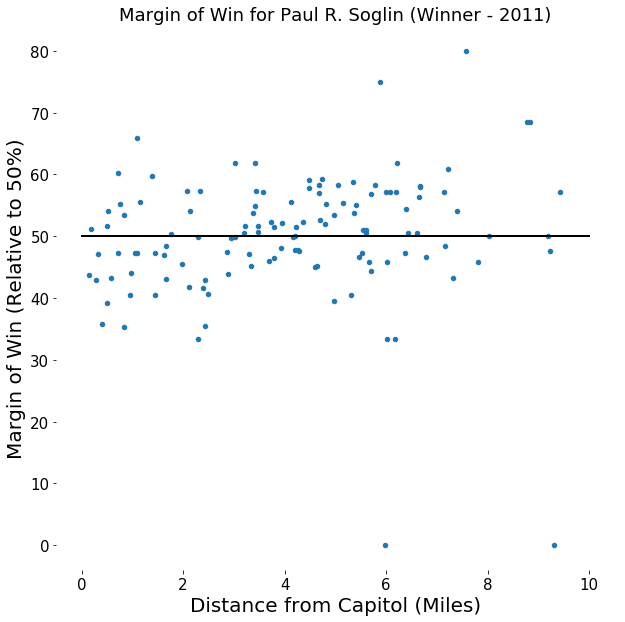

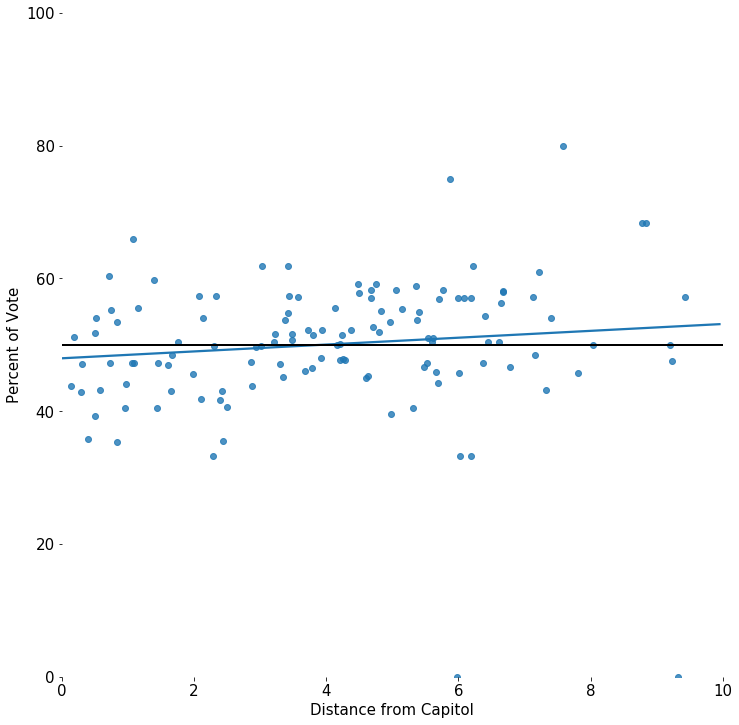

In [57]:
ax = distance.plot.scatter(x='distance',y='Votes', figsize=(10,10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylabel('Margin of Win (Relative to 50%)', fontsize=20)
ax.set_xlabel('Distance from Capitol (Miles)',fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.plot([0, 10], [50, 50], 'k-', lw=2)
sns.lmplot(x='distance',y='Votes',data=distance,fit_reg=True, ci=None, size=10) 
plt.plot([0, 10], [50, 50], 'k-', lw=2)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.axis((0,10,0,100))
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Percent of Vote", fontsize=15)
plt.xlabel("Distance from Capitol", fontsize=15)

ax.set_title('Margin of Win for Paul R. Soglin (Winner - 2011)', fontsize=18)

In [58]:
#Conclusion: Paul Soglin appears to have a larger percentage of the vote the further one gets from the Capitol,
#but the best fit line has a small slope.

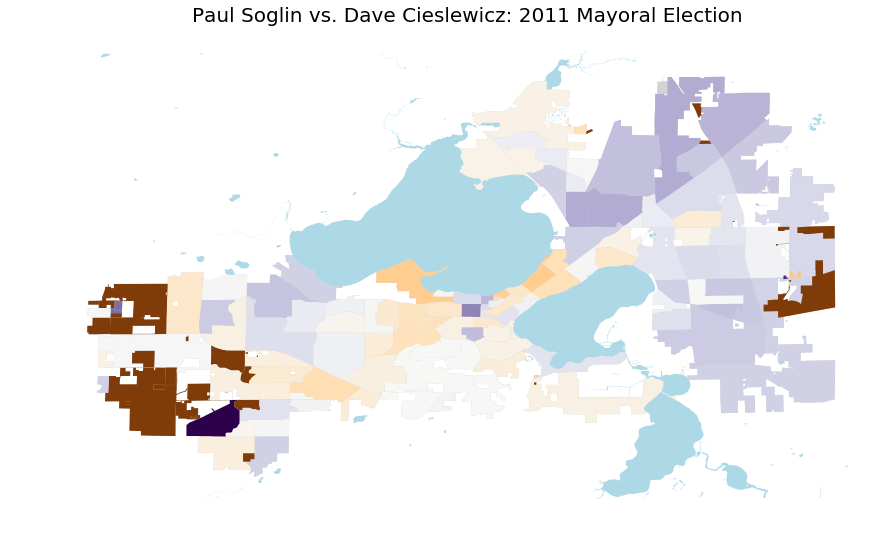

In [60]:

ax = city.plot(color="lightgray", figsize=(15,15))
water.plot(color="lightblue", ax=ax)
norm=MidpointNormalize(midpoint=50)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="15%", pad=0.1)
turnout_ward.plot(column="Votes", cmap="PuOr", norm=norm,figsize=(15,15), ax=ax)
ax.set_title("Paul Soglin vs. Dave Cieslewicz: 2011 Mayoral Election", fontsize=20)

ax.set_axis_off()

In [61]:
file = open("ElectionResults_2011_copy.csv", encoding = 'utf-8')
file_reader = csv.reader(file)
f = list(file_reader)
header = f[0]
info = f[1:]
turnout = pd.DataFrame(info, columns=header)
turnout['Wards'] = turnout["Wards"].astype(int)

In [62]:
turnout['Paul R. Soglin'] = turnout['Paul R. Soglin'].astype(float)
turnout['Dave Cieslewicz'] = turnout['Dave Cieslewicz'].astype(float)

turnout["Diff"] = (turnout["Dave Cieslewicz"]/(turnout["Dave Cieslewicz"]+turnout["Paul R. Soglin"]))*100

In [63]:
geog = list(wards["geometry"])
wds = list(wards["WARD"])

v = list(turnout["Wards"])
d = list(turnout["Diff"])

In [64]:
ward_num = []
shape = []
turn = []

for num in v:

    for ward in wds:
        if num == ward:
            ward_num.append(ward)
            turn.append(d[v.index(num)])
            shape.append(geog[wds.index(ward)])
            
zipped = list(zip(ward_num,turn, shape))
turnout_ward = pd.DataFrame(zipped, columns=["Ward", "Votes", "geometry"])
turnout_ward = geopandas.GeoDataFrame(turnout_ward, geometry="geometry")

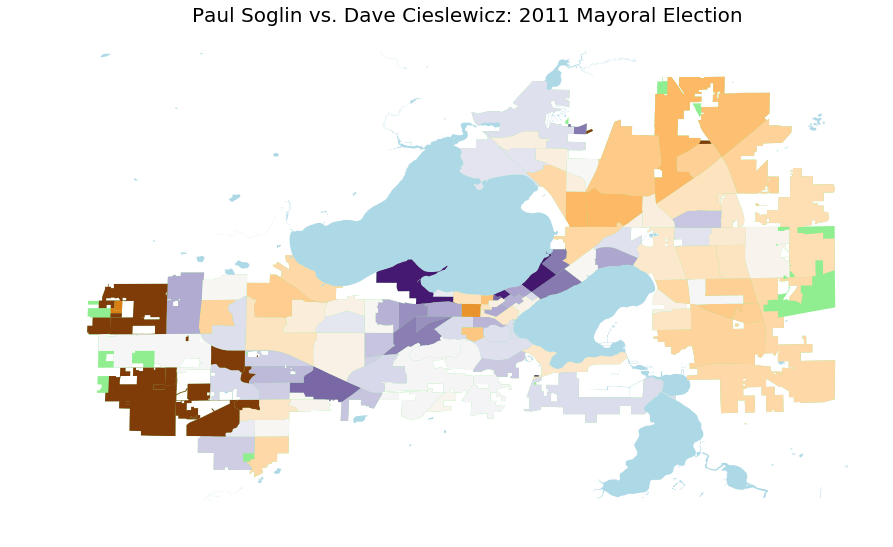

In [65]:

ax = city.plot(color="lightgreen", figsize=(15,15))
water.plot(color="lightblue", ax=ax)
norm=MidpointNormalize(midpoint=50)
#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="15%", pad=0.1)
turnout_ward.plot(column="Votes", cmap="PuOr", norm=norm,figsize=(15,15), ax=ax)
ax.set_title("Paul Soglin vs. Dave Cieslewicz: 2011 Mayoral Election", fontsize=20)

ax.set_axis_off()

In [2]:
import csv
import pandas
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import sqlite3
file = open('Election_Statistics.csv', encoding='utf-8')
file_reader = csv.reader(file)
Election_Stats = list(file_reader)
header = Election_Stats[0]
Turnout = Election_Stats[1:]
header[0] = 'Election'

In [3]:
Election_Stats
i = 0
for row in Election_Stats:
    j = 0
    for val in row:
        if (Election_Stats[i][j] == ''):
            Election_Stats[i][j] = '0'
        j += 1
    i += 1

In [4]:
Stats = DataFrame(Election_Stats, columns = header)
Stats = Stats[1:]

In [5]:
l = []
for item in Stats["Turnout"]:
    if (item == ''):
        item = item.replace('', '0')
    for num in item:
        if num == ',':
            item = item.replace(',','')
        if num == '.':
            item = item.replace('.','')
    l.append(int(item))
Turnout = pd.Series(l)

In [6]:
i = 0
l = []
for item in Stats["Election"]:
    if i < 29:
        item = item[0:2]
        item = int('20' + item)
    if (i >= 29 and i < 58):
        item = item[0]
        item = int('200' + item)
    if (i >= 58 and i < 62):
        item = item[-2:]
        item = int( '20' + item)
    if (i >= 62):
        item = item[-2:]
        item = int('19' + item)
    l.append(item)
    i+=1
Year = pd.Series(l)

In [7]:
zipped_list = list(zip(Turnout,Year,Stats["Type_of_Election"]))

In [8]:
df = pd.DataFrame(zipped_list, columns = ['Turnout','Year','Election_Type'])

In [9]:
df

,Turnout,Year,Election_Type
0,42716,2018,Sup. Ct. Primary
1,377,2017,Special Co. Board
2,49495,2017,Alder/School
3,39904,2017,DPI/MMSD Primary
4,154100,2016,Presidential
5,42034,2016,Congress/State
6,118219,2016,Presidential Pref.
7,38570,2016,Sup. Ct. Primary
8,54247,2015,Mayoral
9,22000,2015,Mayoral Primary


In [10]:
conn = sqlite3.connect('df')
df.to_sql("df", conn, if_exists="replace", index=False)
def qry(sql):
    return pd.read_sql(sql,conn)

In [11]:
Presidential = qry('''
SELECT Year, Turnout/1000 as Turnout
FROM df
WHERE Election_Type = "Presidential"
GROUP By Year
ORDER BY Year
''')

In [12]:
Mayoral = qry('''
SELECT Year, Turnout/1000 as Turnout
FROM df
WHERE Election_Type = "Mayoral"
OR Election_Type = "Mayor"
OR Election_Type = "Mayor/Co Exec"
GROUP BY Year
ORDER BY Year
''')

In [13]:
Gubernatorial = qry('''
SELECT Year, sum(Turnout)/1000 as Turnout
FROM df
WHERE Election_Type = "Governor"
GROUP By Year
ORDER BY Year
''')
Gubernatorial

,Year,Turnout
0,1986,99
1,1990,83
2,1994,84
3,1998,132
4,2002,135
5,2006,137
6,2010,141
7,2014,122


In [14]:
State_Primaries = qry('''
SELECT Year, Turnout/1000 as Turnout
FROM df
WHERE Election_Type = "State Primary"
OR Election_Type = "Congress/State"
GROUP By Year
ORDER BY Year
''')

In [15]:
Presidential_Pref = qry('''
SELECT Year, Turnout/1000 as Turnout
FROM df
WHERE Election_Type = "Presdntl Pref."
OR Election_Type = "Pesidential Pref"
OR Election_Type = "Presidential Pref."
OR Election_Type = "Presidential Pref"
GROUP By Year
ORDER BY Year
''')


In [16]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
#matplotlib.rcParams['font.size'] = 15
#ax = Presidential.plot.line(x = 'Year', y = 'Turnout', label = "Presidential")
#Mayoral.plot.line( x = 'Year', y = 'Turnout', ax=ax, label = "Mayoral",linestyle = 'dotted')
#Gubernatorial.plot.line( x = 'Year', y = 'Turnout', ax=ax, label = "Gubernatorial", linestyle = 'dashed')
#State_Primaries.plot.line( x = 'Year', y = 'Turnout', ax=ax, label = "State Primaries")
#Presidential_Pref.plot.line( x = 'Year', y = 'Turnout', ax=ax, label = "Pres. Primary", linestyle = 'dashdot')
#plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)
#ax.set_ylabel("Turnout (in thousands)")
#ax.set_xlabel("Year")
#ax.set_ylabel('Turnout')
#ax.set_title("Voter Turnout By Election Over Time", fontsize=16, fontweight='bold', style= 'italic')
#fig = plt.figure(figsize = (15,12))
#grid_size = (3,2)
#hosts_to_fmt = []


In [17]:
#over 250% turnout increase in Presidential Primary between 2012 and 2016. Likely due to both Parties nominating that year
#Error fixed in Gubernational line. Data entered as 2 separate entries now summed to one value
#Governor election trend line surpasses Presidential election trend line from 1994 to 2002. This looks likely due to a huge
    #turnout in 1996, where Dane county voted strongly Democratic to attempt to vote incumbent Gov. Tommy Thompson.
#Big Increases in turnout in recent years
#Found data for rest of State Primary line


In [18]:
#types = qry('''
#SELECT Election_Type, count(Election_Type) as 'Count'
#FROM df
#GROUP BY Election_Type
#ORDER BY Count DESC
#''')
#types

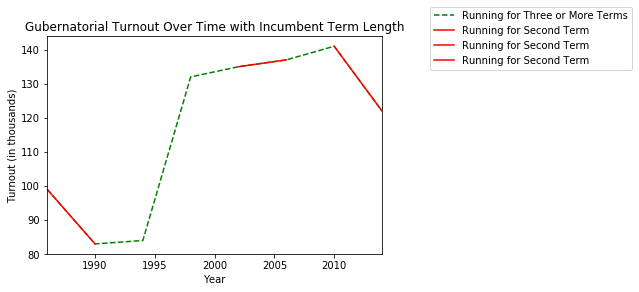

In [33]:
ax = Gubernatorial.plot.line( x = 'Year', y = 'Turnout', label = "Running for Three or More Terms",linestyle='dashed', color = "green")
ax.set_ylabel("Turnout (in thousands)")
ax.set_xlabel("Year")
ax.set_title("Gubernatorial Turnout Over Time with Incumbent Term Length")
Gubernatorial[0:2].plot.line( ax=ax, x = 'Year', y = 'Turnout', label = "Running for Second Term", color = "red")
Gubernatorial[4:6].plot.line( ax=ax, x = 'Year', y = 'Turnout', label = "Running for Second Term", color = "red")
Gubernatorial[6:8].plot.line( ax=ax, x = 'Year', y = 'Turnout', label = "Running for Second Term", color = "red")
plt.legend(bbox_to_anchor=(1, 1),bbox_transform=plt.gcf().transFigure)

In [34]:
#Visualization of the Trends Modeled over Time by the Change in Gubernatorial Turnout vs Incumbent Term Number bar plot (Below)

In [35]:
k = Gubernatorial['Turnout'][3]/ Gubernatorial['Turnout'][2]

In [36]:
n = Gubernatorial['Turnout'][6]/ Gubernatorial['Turnout'][5]

In [37]:
g = Gubernatorial['Turnout'][2]/ Gubernatorial['Turnout'][1]

In [38]:
threefour = (((k+n+g)/3)-1)*100

In [39]:
 f = Gubernatorial['Turnout'][1]/ Gubernatorial['Turnout'][0]

In [40]:
j = Gubernatorial['Turnout'][5]/ Gubernatorial['Turnout'][4]

In [41]:
m = Gubernatorial['Turnout'][7]/ Gubernatorial['Turnout'][6]

In [42]:
second = (((f+j+m)/3)-1)*100

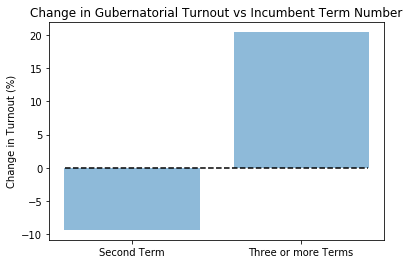

In [47]:
threshold = 0
values = [second, threefour]
labels = ["Second Term","Three or more Terms"]
y_pos = np.arange(len(labels))
plt.bar(y_pos, values, align='center', alpha=0.5)
plt.xticks(y_pos, labels)
plt.ylabel('Change in Turnout (%)')
plt.title('Change in Gubernatorial Turnout vs Incumbent Term Number')
plt.plot([-.395,1.395],[threshold,threshold], color = 'black', linestyle = 'dashed')

In [44]:
#Calculated by taking a specific election year and comparing 
#its turnout with that of the previous year.
#Averages the Change in Turnout From year-to-year grouping by
#whether the incumbent governor is running for a second term
#or if incumbent official is running for 3+ terms
#important to note that in the Data set, every governor served
#at least 2 terms.

#--Voter Turnout increased by an average of about 20%
#  when the incumbent Governor was running for 3 or more terms
#--Voter Turnout decreased by an average of about 9%
#  when the incumbent governor was running for their
#  first re-election (2nd term)
#**Missing 2018 election, which would likely give more data 
#  in support of greater turnout in 3+ term elections
#**Only 4 different Governors have been elected in the data set
#  so the sampling size isn't ideal